## Javad Ranjbar Kermani
## 400209795
## Question 2
## PCA algorithm

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
# Loading Iris dataset
iris = load_iris()
# creationg dataframe of features in iris dataset (not target) to have unsupervised learning
iris_df = pd.DataFrame(iris.data,columns = [iris.feature_names]) 
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
#scaling and centering dataset using sklearn standardscaler
from sklearn.preprocessing import StandardScaler
X1 = iris.data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)
print(X_scaled[0:10]) 

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]


### PCA algorithm 

In [4]:
# this fuction compute PCA algorithm manually
def PCA_manual(X,k):
    """
    output :
    This function reuturns X_star (dataset after Dimensionality reduction), number_of_components (first k columns
    eigenvector matrix), eig_values(eigenvalues of covariance matrix), cov_matrix(covraince matrix of dataset)
    input :
    X: data for Dimensionality reduction by PCA algorithm
    k: number of component or k first columns of eigenvector matrix
    """
    # data centering using the following for loop
    # every sample substracts from the average of its column
    for i in range(X.shape[1]):    
        X[:,i]=X[:,i]-X[:,i].mean()
    cov_matrix = np.cov(X.T) #covariance matrix
    eig_values, eig_vects = np.linalg.eig(cov_matrix) #eigenvalues and eigenvectors of covariance matrix 
    eig_vects = eig_vects.T 
    #sorting eigenvalues and eigenvectors 
    sort = np.argsort(eig_values)[::-1]
    eig_values = eig_values[sort]
    eig_vects = eig_vects[sort]
    # first k columns of eigenvector matrix 
    number_of_components = eig_vects.T[:,0 : k]
    #creating new dataset which has lower dimension
    X_star = np.dot(X, number_of_components)
    return X_star , number_of_components , eig_values, cov_matrix

In [5]:
X1_star_manual, eigenvector1_maual, eig_values1_maual, cov_matrix1_manual   = PCA_manual (X_scaled , k = 4)
print('covariance matrix for manual PCA : \n\n',cov_matrix1_manual,'\n\n')
print('eigenvalues for manual PCA : \n\n',eig_values1_maual,'\n\n')
print('first desired columns of eigenvectors : \n\n',eigenvector1_maual,'\n\n')
print('Dimensionality reduction dataset for manual PCA(5rows) : \n\n',X1_star_manual[0:5])

covariance matrix for manual PCA : 

 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]] 


eigenvalues for manual PCA : 

 [2.93808505 0.9201649  0.14774182 0.02085386] 


first desired columns of eigenvectors : 

 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]] 


Dimensionality reduction dataset for manual PCA(5rows) : 

 [[-2.26470281 -0.4800266  -0.12770602  0.0241682 ]
 [-2.08096115  0.67413356 -0.23460885  0.10300677]
 [-2.36422905  0.34190802  0.04420148  0.02837705]
 [-2.29938422  0.59739451  0.09129011 -0.06595556]
 [-2.38984217 -0.64683538  0.0157382  -0.03592281]]


In [6]:
#print(eig_values[0]/np.sum(eig_values))
eig_values = eig_values1_maual
var = np.zeros((4))
for i in range(4):
    var[i] = eig_values[i]/(np.sum(eig_values))
var

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

[0.72962445 0.95813207 0.99482129 1.        ]


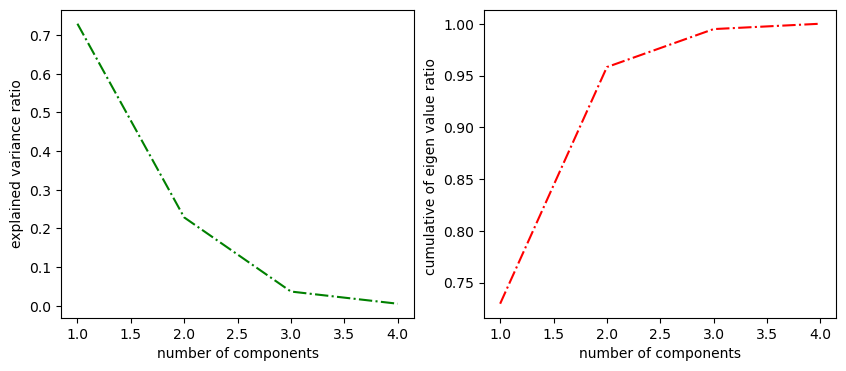

In [7]:
variance_manual = var
cumsum_manual = np.cumsum(var)
print(cumsum_manual)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(1,5),variance_manual,color = 'green',linestyle = '-.')
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')
plt.subplot(1,2,2)
plt.plot(range(1,5),cumsum_manual,color = 'red',linestyle = '-.')
plt.xlabel('number of components')
plt.ylabel('cumulative of eigen value ratio ')
plt.show()

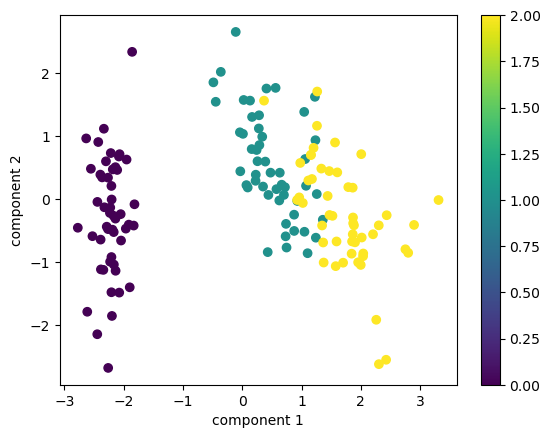

In [8]:
y = iris.target
x1 = X1_star_manual[:,0]
x2 = X1_star_manual[:,1]
plt.scatter(x1,x2 , c=y)
plt.colorbar()
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

### PCA with scikit learn library

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4) 
X1_pca_library = pca.fit_transform(X_scaled)
X1_pca_library.shape

(150, 4)

In [10]:
print('PCA using library\n')
print('explained variance ratio :\n',pca.explained_variance_ratio_ ,'\n')
print('number of components :',pca.n_components_,'\n')
print('eigenvector of corresponding components :\n',pca.components_.T)

PCA using library

explained variance ratio :
 [0.72962445 0.22850762 0.03668922 0.00517871] 

number of components : 4 

eigenvector of corresponding components :
 [[ 0.52106591  0.37741762 -0.71956635 -0.26128628]
 [-0.26934744  0.92329566  0.24438178  0.12350962]
 [ 0.5804131   0.02449161  0.14212637  0.80144925]
 [ 0.56485654  0.06694199  0.63427274 -0.52359713]]


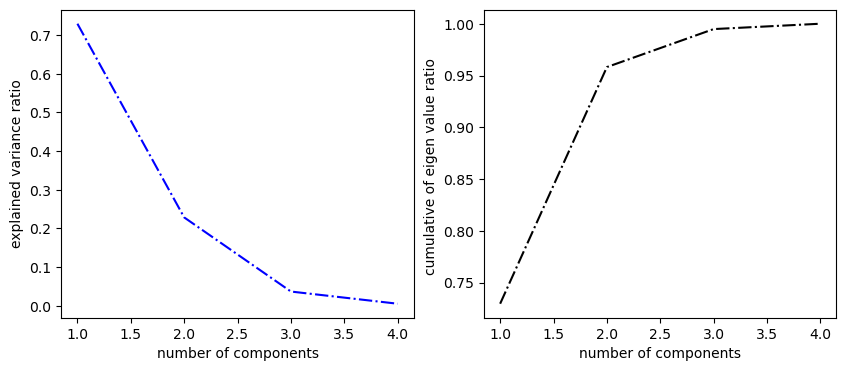

In [11]:
variance_library = pca.explained_variance_ratio_
cumsum_library = np.cumsum(variance_library)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(1,5),variance_library,color = 'blue' ,linestyle = '-.')
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')
plt.subplot(1,2,2)
plt.plot(range(1,5),cumsum_library,color = 'black', linestyle = '-.')
plt.xlabel('number of components')
plt.ylabel('cumulative of eigen value ratio ')
plt.show()

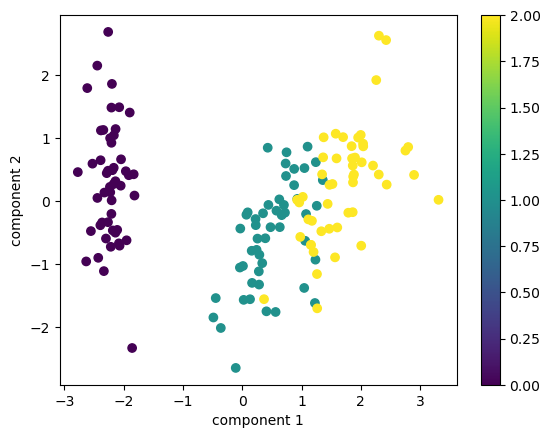

In [12]:
y = iris.target #target of flower in iris dataset
x1 = X1_pca_library[:,0]
x2 = X1_pca_library[:,1]
plt.scatter(x1,x2 ,c=y )
plt.colorbar()
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

### PCA manual and scikit learn algorithm for random array shape dataset 

In [13]:
X2 = np.random.rand(200 , 4) # random scaled dataset

In [14]:
X2_star_manual, eigenvector2_maual, eig_values2_maual, cov_matrix2_manual = PCA_manual(X2 , k = 1)
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
X2_pca_library = pca.fit_transform(X2)
print('eigenvector manual : ',eigenvector2_maual)
print('eigenvector using scikit library : ',pca.components_)

eigenvector manual :  [[ 0.35905897]
 [-0.27655229]
 [ 0.56899267]
 [-0.68617988]]
eigenvector using scikit library :  [[ 0.35905897 -0.27655229  0.56899267 -0.68617988]]
